In [52]:
library(tidyr)
library(dplyr)
library(ggplot2)
library("ggpubr")
library(lsmeans)
library("lme4")
library(rstatix)

In [2]:
#import habitat and survivorship data
nutri = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_nutrients.csv", 
                header = T
)
head(nutri, n=2)
dim(nutri)


sst = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_sst_chla.csv", 
                header = T
)
head(sst, n=2)
dim(sst)


chla = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/chla_sst_outplant_stations.csv", 
                header = T
)
head(chla, n=2)
dim(chla)

tcm = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_TCM_combo.csv", 
                header = T
)
head(tcm, n=2)
dim(tcm)


live = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_apal_live.csv", 
                header = T
)
head(live, n=2)
dim(live)

,Samp_trip,file,zhang_ID,reef,collection_date,Month,Year,Si.uM.,NO2.uM.,N.N.uM.,⋯,date_processed,STD,Wash,watercolumn,transect,filtered,chloroform,dilution_factor,latitude,longitude
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,1,POR_nutrients_samp_trip1,Zhang-03,cf,26-Nov-18,November,2018,1.153,0.023,0.673,⋯,12/20/18,LNSW,LNSW,bottom,AC12,yes,yes,NA,NA,NA
2,2,POR_nutrients_samp_trip2,Zhang-01,cf,28-Feb-19,February,2019,0.335,0.022,0.996,⋯,3/7/19,LNSW,LNSW,bottom,Ap 35,yes,yes,NA,NA,NA


[1] 80 23

,reef,collection_date,Year,Month,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,pr,14-Nov-18,2018,November,24.985,-80.416,0.9965124,0.6535258,27.42548,0.1301989
2,gr,15-Nov-18,2018,November,25.110,-80.304,0.7318034,0.4607393,27.50922,0.1089550


[1] 20 10

,reef,Year,collection_date,Lat_decimal,Long_decimal,avg_chla_8day_.mg.m.3.,sd_chla_8day_.mg.m.3.,avg_chla_monthly_.mg.m.3.,sd_chla_monthly_.mg.m.3.,avg.SST..deg.C.,sd.SST..deg.C.
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cf,2018,26-Nov-18,25.221,-80.21,1.1299891,0.6305609,1.481547,0.8310220,26.61859,0.1554472
2,cf,2019,28-Feb-19,25.221,-80.21,0.6960258,0.4539086,1.249507,0.8486629,25.96821,0.1514858


[1] 20 11

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,place
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,22-Oct-18,36.25,156.41,-33.22,14.51,23.4131,cf,top
2,22-Oct-18,36.25,156.39,-33.22,14.52,23.2627,cf,top


[1] 730278      8

,reef,Genotype,Fragment_num,collection_date,day,Month,Year,Survey.,Fragment_number,LiveFrag,ColType,L,W,H,live_per,Adjusted.Area,S01FragCount
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>
1,gr,ML2,1,15-Jun-18,15,June,2018,1,A,1,L,7,NA,NA,100.00%,27.2065,7
2,gr,ML2,1,15-Jun-18,15,June,2018,1,B,1,L,8,NA,NA,100.00%,23.2441,7


[1] 9013   17

In [3]:
#added column headers to this file. Imported habitat data will be merged with this file and the final merged file will be used in microbiome analysis
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_seq.csv", 
                header = T
)
head(meta, n=2)
dim(meta)

,sample_ID,bag_num,sample_ID2,Fragment_number,Health,collection_date,Month,Year,Samp_trip,joining_info,⋯,sampling_trip,X,colour_reef,colour_genotype,colour_reef_genotype,colour_timepoint,colour_timepoint_reef,cluster_latitude,cluster_longitude,cluster_depth
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,apal_cf_gML2_cl78_frB_AH_2019-06-25,bagnumber-1009,apal_cf_gML2_cl78_frB_AH_2019-06-25,B,AH,25-Jun-19,June,2019,Trip_3,ML2_Cluster_78_B_cf,⋯,3,NA,blue4,orangered,yellow3,maroon2,black,25.2207,-80.21037,20.9
2,apal_cf_gML2_cl78_fr3_AH_2019-06-25,bagnumber-1010,apal_cf_gML2_cl78_fr3_AH_2019-06-25,3,AH,25-Jun-19,June,2019,Trip_3,ML2_Cluster_78_3_cf,⋯,3,NA,blue4,orangered,yellow3,maroon2,black,25.2207,-80.21037,20.9


[1] 363  26

In [4]:
#get depth information
meta%>%
  group_by(reef) %>%
  summarise(mean_cluster_depth = mean(cluster_depth, na.rm = TRUE),
            sd_cluster_depth = sd(cluster_depth, na.rm = TRUE))


reef,mean_cluster_depth,sd_cluster_depth
<chr>,<dbl>,<dbl>
cf,18.99639,1.2176993
ndr,12.09124,0.6238489
pr,17.02014,1.0495120


## Add nutrients data

In [5]:
head(nutri, n=2)
dim(nutri)

,Samp_trip,file,zhang_ID,reef,collection_date,Month,Year,Si.uM.,NO2.uM.,N.N.uM.,⋯,date_processed,STD,Wash,watercolumn,transect,filtered,chloroform,dilution_factor,latitude,longitude
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,1,POR_nutrients_samp_trip1,Zhang-03,cf,26-Nov-18,November,2018,1.153,0.023,0.673,⋯,12/20/18,LNSW,LNSW,bottom,AC12,yes,yes,NA,NA,NA
2,2,POR_nutrients_samp_trip2,Zhang-01,cf,28-Feb-19,February,2019,0.335,0.022,0.996,⋯,3/7/19,LNSW,LNSW,bottom,Ap 35,yes,yes,NA,NA,NA


[1] 80 23

In [6]:
nutri_sum= nutri %>%
filter(chloroform=="yes") %>%
filter(filtered=="yes") %>%
select(-c(STD, Wash, file, zhang_ID, latitude,longitude, NH4.uM.,  dilution_factor, Samp_trip)) %>%
group_by(collection_date, reef) %>%
summarise(across(where(is.numeric), ~ mean(.x, na.rm = TRUE)))  %>%
right_join(meta)

head(nutri_sum, n=2)

`summarise()` has grouped output by 'collection_date'. You can override using the `.groups` argument.
Joining with `by = join_by(collection_date, reef, Year)`


collection_date,reef,Year,Si.uM.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,sample_ID,bag_num,⋯,sampling_trip,X,colour_reef,colour_genotype,colour_reef_genotype,colour_timepoint,colour_timepoint_reef,cluster_latitude,cluster_longitude,cluster_depth
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1-Mar-19,pr,2019,0.504,0.015,0.729,0.714,0.037,apal_pr_gCN2_cl75_fr3_AH_2019-03-01,bagnumber-584,⋯,2,NA,greenyellow,blue4,maroon2,blue4,orangered,24.98454,-80.41658,15.7
1-Mar-19,pr,2019,0.504,0.015,0.729,0.714,0.037,apal_pr_gCN2_cl75_fr4_AH_2019-03-01,bagnumber-585,⋯,2,NA,greenyellow,blue4,maroon2,blue4,orangered,24.98454,-80.41658,15.7


In [7]:
nutri_sum %>%
  group_by(reef) %>%
  summarise(across(c(Si.uM., NO2.uM., N.N.uM.,NO3.uM.,PO4.uM.),
 list(mean = mean, sd = sd), na.rm = TRUE))

nutri_sum %>%
  group_by(	sampling_trip) %>%
  summarise(across(c(Si.uM., NO2.uM., N.N.uM.,NO3.uM.,PO4.uM.), mean, na.rm=TRUE))



nutri_sum %>%
group_by(sampling_trip) %>%
  summarise(across(c(Si.uM., NO2.uM., N.N.uM., NO3.uM., PO4.uM.),
                   list(mean = mean, sd = sd), na.rm = TRUE))

Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(...)`.
ℹ In group 1: `reef = "cf"`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


reef,Si.uM._mean,Si.uM._sd,NO2.uM._mean,NO2.uM._sd,N.N.uM._mean,N.N.uM._sd,NO3.uM._mean,NO3.uM._sd,PO4.uM._mean,PO4.uM._sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cf,0.4169257,0.2237507,0.02617269,0.006344526,0.9171084,0.4026000,0.8909357,0.3981003,0.05254819,0.011973026
ndr,0.2879505,0.2157364,0.02554952,0.005678762,0.8917198,0.5199243,0.8663986,0.5156914,0.04450483,0.009994989
pr,0.7821854,0.6565990,0.01946445,0.004343713,0.8958032,0.4655999,0.8759966,0.4631303,0.05365711,0.025186997


sampling_trip,Si.uM.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.3879794,0.02012371,0.8619072,0.8417835,0.04439175
3,0.6040663,0.02675000,1.3861990,1.3594490,0.04232143
4,0.1113924,0.03005425,1.0992495,1.0692134,0.06350814
5,0.8964026,0.01701498,0.2257097,0.2084869,0.05226779


sampling_trip,Si.uM._mean,Si.uM._sd,NO2.uM._mean,NO2.uM._sd,N.N.uM._mean,N.N.uM._sd,NO3.uM._mean,NO3.uM._sd,PO4.uM._mean,PO4.uM._sd
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.3879794,0.09022252,0.02012371,0.0040343776,0.8619072,0.10952426,0.8417835,0.10611307,0.04439175,0.008802884
3,0.6040663,0.07072867,0.02675000,0.0043305734,1.3861990,0.29096541,1.3594490,0.29429071,0.04232143,0.017890597
4,0.1113924,0.07842576,0.03005425,0.0037965188,1.0992495,0.22763215,1.0692134,0.22557162,0.06350814,0.016968174
5,0.8964026,0.82168610,0.01701498,0.0009586266,0.2257097,0.08351875,0.2084869,0.08454956,0.05226779,0.020463114


## Add temperature and chla sampling time points only

In [8]:
sst_sum=nutri_sum %>%
left_join(sst, join_by( collection_date,reef))

head(sst_sum, n=2)
dim(sst_sum)

collection_date,reef,Year.x,Si.uM.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,sample_ID,bag_num,⋯,cluster_longitude,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-Mar-19,pr,2019,0.504,0.015,0.729,0.714,0.037,apal_pr_gCN2_cl75_fr3_AH_2019-03-01,bagnumber-584,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
1-Mar-19,pr,2019,0.504,0.015,0.729,0.714,0.037,apal_pr_gCN2_cl75_fr4_AH_2019-03-01,bagnumber-585,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


[1] 363  39

In [9]:
sst_sum %>%
  group_by(reef) %>%
  summarise(across(c(avgchla_mgm.3, sdchla_mgm.3,avgSST_degC, sdSST_degC),mean, na.rm=TRUE))


sst_sum %>%
  group_by(	sampling_trip) %>%
  summarise(across(c(avgchla_mgm.3, sdchla_mgm.3,avgSST_degC, sdSST_degC), mean, na.rm=TRUE))


sst_sum %>%
  group_by(	sampling_trip, reef) %>%
  summarise(across(c(avgchla_mgm.3, sdchla_mgm.3,avgSST_degC, sdSST_degC), mean, na.rm=TRUE))

reef,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
cf,1.1761927,0.2864686,28.03571,0.3192992
ndr,2.7947048,1.1108525,28.15294,0.4509198
pr,0.8230158,0.4273185,28.01235,0.4725095


sampling_trip,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<int>,<dbl>,<dbl>,<dbl>,<dbl>
2,1.309320,0.5027171,26.15333,0.2846518
3,2.161787,1.0504478,29.72977,0.5284551
4,1.346144,0.1348583,29.15394,0.5567160
5,1.741090,0.8471071,27.37384,0.3645473


`summarise()` has grouped output by 'sampling_trip'. You can override using the `.groups` argument.


sampling_trip,reef,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,cf,0.6960258,0.4539086,25.96821,0.1514858
2,ndr,2.7002575,0.8883858,26.45431,0.4208808
2,pr,0.3999531,0.1630120,25.99442,0.2483825
3,cf,1.7920917,0.3763544,29.63623,0.5081026
3,ndr,3.0906976,1.6064865,30.03815,0.3614116
3,pr,1.5077771,0.9649057,29.49291,0.7047354
4,cf,1.1930631,0.0000000,29.41868,0.4285187
4,ndr,1.9975726,0.0000000,29.05134,0.6739111
4,pr,0.8388900,0.3133472,29.12768,0.5098662


In [10]:


# Pivot the data to long format
nutri_sum_long <- nutri_sum %>%
  pivot_longer(cols = c("Si.uM.", "NO2.uM.", "NO3.uM.", "PO4.uM."),
               names_to = "metric", values_to = "Nutrients") %>%
  mutate(metric = factor(metric, levels = c("Si.uM.", "NO2.uM.", "NO3.uM.", "PO4.uM.")))



mixed_model_no_intercept <- lm(sqrt(Si.uM.) ~ 0 + reef, data = nutri_sum)
summary(mixed_model_no_intercept)

# Get estimated marginal means and perform pairwise comparisons for the no-intercept model
emms_no_intercept <- emmeans(mixed_model_no_intercept, ~ reef)
pairwise_comparisons_no_intercept <- contrast(emms_no_intercept, method = "pairwise")
print(pairwise_comparisons_no_intercept)


Call:
lm(formula = sqrt(Si.uM.) ~ 0 + reef, data = nutri_sum)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36903 -0.10632 -0.09064  0.22547  0.56367 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
reefcf   0.61476    0.02954   20.81   <2e-16 ***
reefndr  0.49166    0.02291   21.46   <2e-16 ***
reefpr   0.81625    0.02259   36.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2691 on 360 degrees of freedom
Multiple R-squared:  0.8594,	Adjusted R-squared:  0.8582 
F-statistic: 733.2 on 3 and 360 DF,  p-value: < 2.2e-16


 contrast estimate     SE  df t.ratio p.value
 cf - ndr    0.123 0.0374 360   3.293  0.0031
 cf - pr    -0.201 0.0372 360  -5.418  <.0001
 ndr - pr   -0.325 0.0322 360 -10.089  <.0001

Note: contrasts are still on the sqrt scale 
P value adjustment: tukey method for comparing a family of 3 estimates 


In [11]:

library(rstatix)

# Prepare data

stat.test= nutri%>%
#filter(chloroform=="yes") %>%
filter(reef!="gr") %>%
filter(Year=="2019") %>%
filter(filtered=="yes") %>%
select(-c(STD, Wash, file, zhang_ID, latitude,longitude, NH4.uM.,  dilution_factor, Samp_trip)) %>%
group_by(collection_date, reef) %>%
  pivot_longer(cols = c("Si.uM.", "NO2.uM.", "NO3.uM.", "PO4.uM."),
               names_to = "metric", values_to = "Nutrients") %>%
  mutate(metric = factor(metric, levels = c("Si.uM.", "NO2.uM.", "NO3.uM.", "PO4.uM."))) %>%
# One sample t-test
  group_by(metric) %>%
  wilcox_test(Nutrients~reef) %>%
  adjust_pvalue() 




stat.test= nutri%>%
#filter(chloroform=="yes") %>%
filter(reef!="gr") %>%
filter(filtered=="yes") %>%
filter(Year=="2019") %>%
select(-c(STD, Wash, file, zhang_ID, latitude,longitude, NH4.uM.,  dilution_factor)) %>%
group_by(collection_date, reef) %>%
  pivot_longer(cols = c("Si.uM.", "NO2.uM.", "NO3.uM.", "PO4.uM."),
               names_to = "metric", values_to = "Nutrients") %>%
  mutate(metric = factor(metric, levels = c("Si.uM.", "NO2.uM.", "NO3.uM.", "PO4.uM."))) %>%
# One sample t-test
  group_by(metric) %>%
  wilcox_test(Nutrients~ Samp_trip) %>%
  adjust_pvalue(method="bonferroni") 



Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


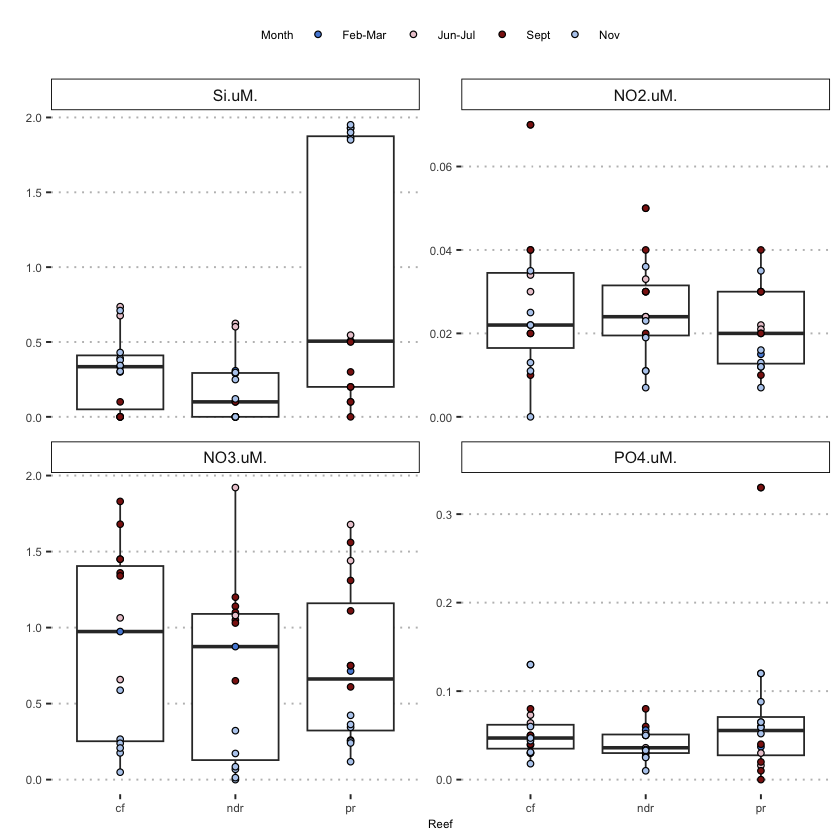

In [12]:
lab1=c("Feb-Mar", "Jun-Jul", "Sept", "Nov")
lab2=c("CF", "NDR", "PR")
fig_nut_reef=
nutri%>%
#filter(chloroform=="yes") %>%
filter(reef!="gr") %>%
filter(Year=="2019") %>%
filter(filtered=="yes") %>%
select(-c(STD, Wash, file, zhang_ID, latitude,longitude, NH4.uM.,  dilution_factor)) %>%
group_by(Samp_trip, reef)  %>%
  pivot_longer(cols = c("Si.uM.", "NO2.uM.", "NO3.uM.", "PO4.uM."),
               names_to = "metric", values_to = "Nutrients") %>%
  mutate(metric = factor(metric, levels = c("Si.uM.", "NO2.uM.", "NO3.uM.", "PO4.uM."))) %>%
ggplot(aes(x = reef, y = Nutrients)) +
geom_boxplot() +
 geom_point(aes(fill = as.factor(Samp_trip)), pch = 21) +
  scale_color_manual("Reefs", values = c("#dad1cb","#767e72","#16375b"), labels = lab2) +
  scale_fill_manual("Months", values=c("#558bd9", "#EBCBD3", "#8c1c13", "#b6cdee"), labels=lab1) +
  facet_wrap(metric ~ ., scales = "free_y", 
             #labeller = labeller(metric = nut_lab)
            ) +
  ylab("") +
  xlab("Reef") +
  theme_pubclean() +
  guides(color = "none") +
  guides(fill = guide_legend(title = "Month")) +
  theme(legend.text = element_text(size = 7), legend.position = "top") +
  theme(axis.title.x = element_text(size = 7)) +
  theme(axis.title.y = element_text(size = 7)) +
  theme(axis.text.x = element_text(size = 7)) +
  theme(axis.text.y = element_text(size = 7)) +
  theme(legend.text = element_text(size = 7)) +
  theme(legend.title = element_text(size = 7)) +
  theme(strip.background = element_rect(fill = "white", color = "black", size = .5)) #+
  #stat_compare_means(comparisons = my_comparisons, method ="wilcox.test")
fig_nut_reef

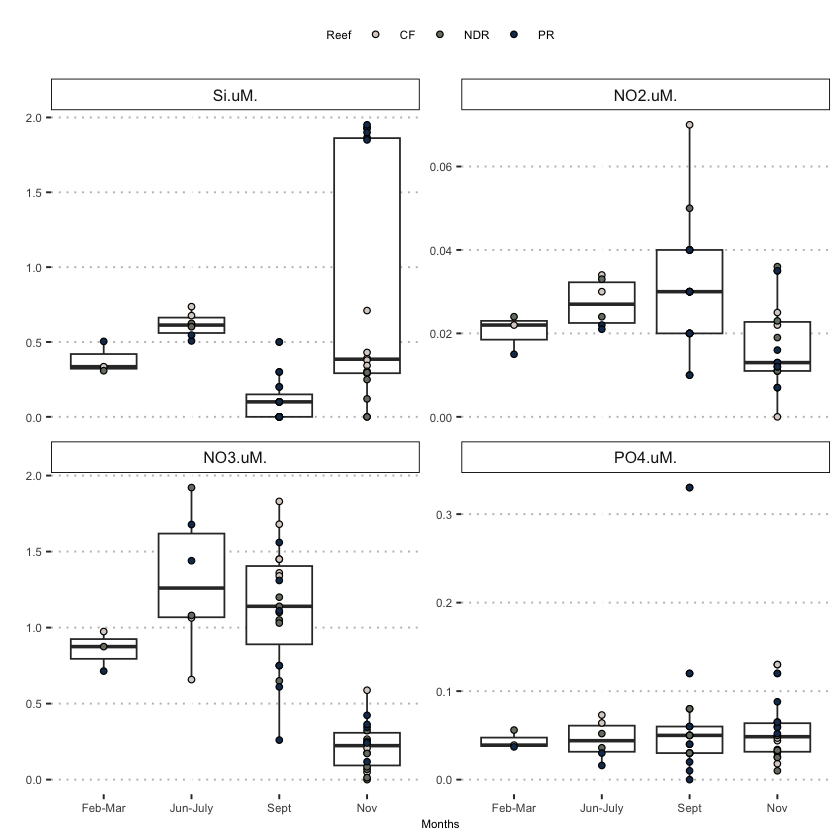

In [13]:
lab1=c("Feb-Mar", "Jun-Jul", "Sept", "Nov")
my_comparisons <- list(c("2", "3"), c("2", "4"),c("2", "5"), c("3", "4"),
                       c("3", "5"), c("5", "4"))

fig_nut_month=nutri %>%
#filter(chloroform=="yes") %>%
filter(reef!="gr") %>%
filter(Year=="2019") %>%
filter(filtered=="yes") %>%
select(-c(STD, Wash, file, zhang_ID, latitude,longitude, NH4.uM.,  dilution_factor)) %>%
group_by(Samp_trip, reef) %>%
  pivot_longer(cols = c("Si.uM.", "NO2.uM.", "NO3.uM.", "PO4.uM."),
               names_to = "metric", values_to = "Nutrients") %>%
  mutate(metric = factor(metric, levels = c("Si.uM.", "NO2.uM.", "NO3.uM.", "PO4.uM."))) %>%
  ggplot(aes(x = as.factor(Samp_trip), y = Nutrients)) +
  geom_boxplot() +
 geom_point(aes(fill = reef), pch = 21) +
  scale_color_manual("Reefs", values = c("#dad1cb","#767e72","#16375b"), labels = lab2) +
  scale_fill_manual("Reefs", values = c("#dad1cb","#767e72","#16375b"), labels = lab2) +
 scale_x_discrete(name = "Months", labels = c("2" = "Feb-Mar", "3" = "Jun-July",
                                               "4" = "Sept", "5" = "Nov")) +
  facet_wrap(metric ~ ., scales = "free_y", 
             #labeller = labeller(metric = nut_lab)
            ) +
  ylab("") +
   theme_pubclean() +
  guides(color = "none") +
  guides(fill = guide_legend(title = "Reef")) +
  theme(legend.text = element_text(size = 7), legend.position = "top") +
  theme(axis.title.x = element_text(size = 7)) +
  theme(axis.title.y = element_text(size = 7)) +
  theme(axis.text.x = element_text(size = 7)) +
  theme(axis.text.y = element_text(size = 7)) +
  theme(legend.text = element_text(size = 7)) +
  theme(legend.title = element_text(size = 7)) +
  theme(strip.background = element_rect(fill = "white", color = "black", size = .5)) #+
  #stat_compare_means(comparisons = my_comparisons, method ="wilcox.test",
   #                  p.adjust.method = "bonferroni")
fig_nut_month

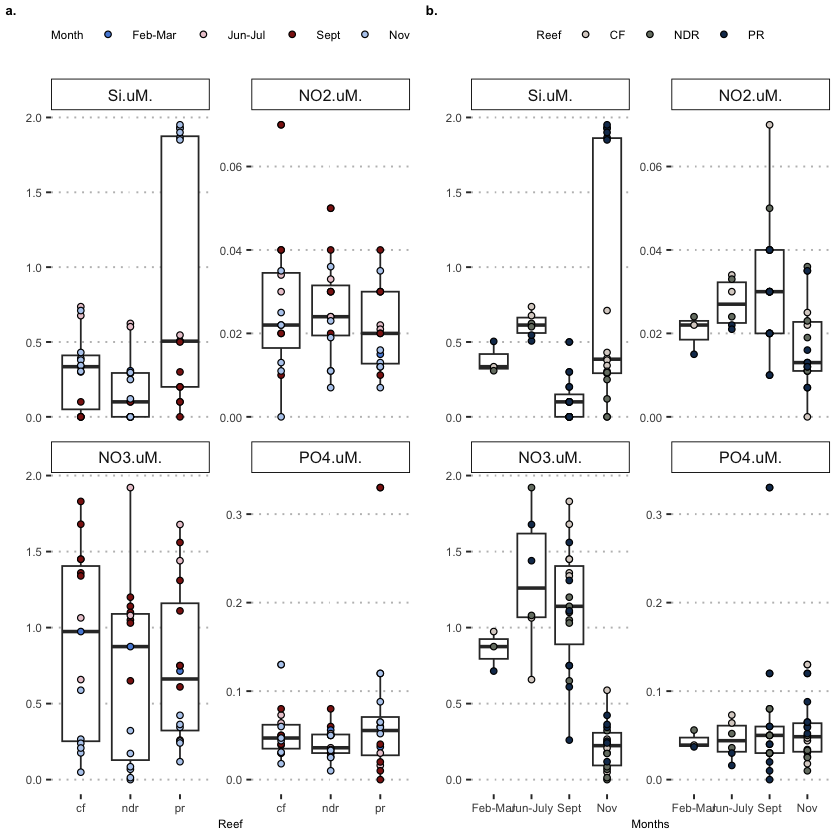

In [14]:
ggpubr::ggarrange(fig_nut_reef, fig_nut_month,
                 common.legend = F, ncol=2,
             labels = c("a.", "b."), font.label = list(size = 8))


#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/supl_fig2.png", width = 9, height = 6, units = "in", dpi=300)     

## percent live fragment 

In [15]:
live_sum <- live %>%
group_by(collection_date, reef, Genotype) %>%
  summarise(total_count = n(),
            LiveFrag_count = sum(LiveFrag, na.rm = TRUE)) %>%
  mutate(Survivorship = LiveFrag_count / total_count) %>% 
right_join(sst_sum)

dim(live_sum)

`summarise()` has grouped output by 'collection_date', 'reef'. You can override using the `.groups`
argument.
Joining with `by = join_by(collection_date, reef, Genotype)`


[1] 363  42

In [16]:
#write.csv(live_sum, "/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_survivorship.csv", 
 #    row.names = FALSE)

In [17]:
tcm = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_TCM_combo.csv", 
                header = T, stringsAsFactors=TRUE
)
head(tcm, n=2)
dim(tcm)

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,place
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,22-Oct-18,36.25,156.41,-33.22,14.51,23.4131,cf,top
2,22-Oct-18,36.25,156.39,-33.22,14.52,23.2627,cf,top


[1] 730278      8

In [18]:
tcm_sum= tcm %>%
filter(Speed.cm.s. <=25) %>%
group_by(collection_date) %>%
summarise(across(where(is.numeric), ~ mean(.x, na.rm = TRUE))) %>%
right_join(live_sum) 
head(tcm_sum, n=2)

Joining with `by = join_by(collection_date)`


collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,total_count,LiveFrag_count,⋯,cluster_longitude,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,21,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,21,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


## TCM data

In [19]:
all_meta=tcm_sum %>%
relocate(bag_num, .before = collection_date)
dim(all_meta)

[1] 363  47

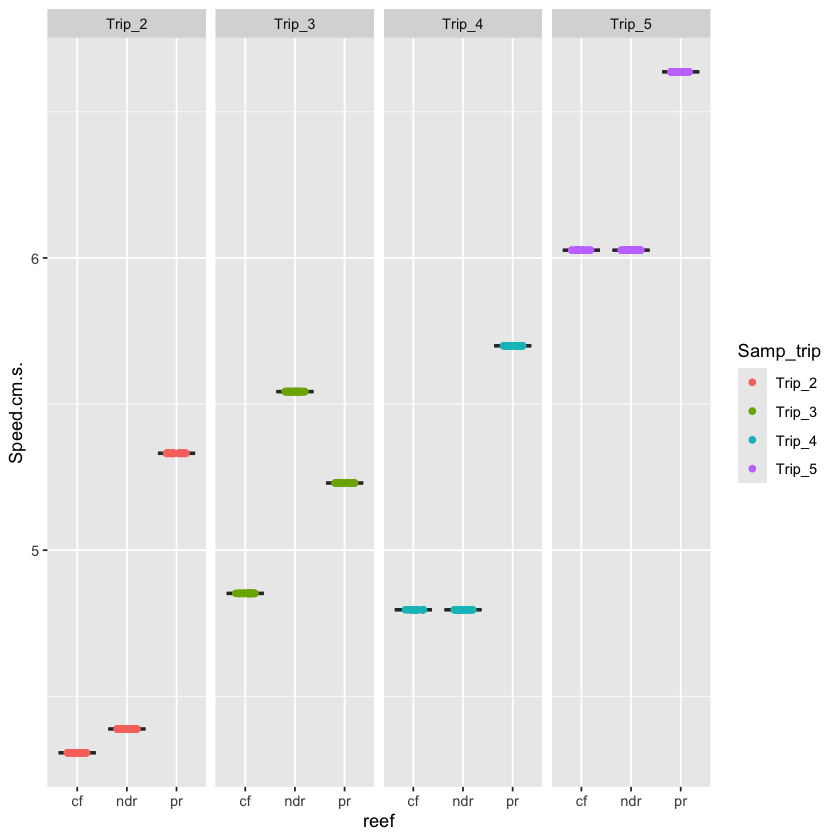

In [20]:
tcm_sum %>%
 ggplot(aes(x = reef, y = Speed.cm.s.))  +
  geom_boxplot(outlier.color = NA)  +
geom_jitter(aes(color = Samp_trip), height = 0, width = .2) +
facet_grid(.~Samp_trip)

## Time-series figure of SST,Chl-a,TCM

In [21]:
#read data for entire year (2019)

temp = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/sst_outplant_daily.csv", 
                header = T, stringsAsFactors=TRUE
)
head(temp, n=2)
dim(temp)


chl = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/chl_outplant_8day.csv", 
                header = T, stringsAsFactors=TRUE
)
head(chl, n=2)
dim(chl)

,date,decimal_year,avg_sst,reef
,<fct>,<dbl>,<dbl>,<fct>
1,1-Jan-19,2019.003,24.96226,cf
2,2-Jan-19,2019.005,25.10979,cf


[1] 1095    4

,date,decimal_year,avg_chl,reef
,<fct>,<dbl>,<dbl>,<fct>
1,29-Jan-19,2019.079,0.7101063,cf
2,6-Feb-19,2019.101,1.1661320,cf


[1] 129   4

In [22]:
#alter date format
chl_all = chl %>%
  separate(col = date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
  select(-date)
head(chl_all)
dim(chl_all)

,month,year,decimal_year,avg_chl,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>
1,Jan,2019,2019.079,0.7101063,cf,2019-Jan-29
2,Feb,2019,2019.101,1.1661320,cf,2019-Feb-6
3,Feb,2019,2019.123,0.2026868,cf,2019-Feb-14
4,Feb,2019,2019.145,0.6445027,cf,2019-Feb-22
5,Mar,2019,2019.167,1.2104095,cf,2019-Mar-2
6,Mar,2019,2019.189,1.1574974,cf,2019-Mar-10


[1] 129   6

In [23]:
#alter date format
chla_points = chla %>%
filter(reef!="gr")  %>%
  separate(col = collection_date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
filter(year!="2018")  %>%
#subset(Date> "2019-1-01" & Date < "2019-12-01") %>%
  select(-date)

head(chla_points, n=2)

chla_points$Date <- as.Date(chla_points$Date, format = "%Y-%b-%d")

,reef,Year,month,year,Lat_decimal,Long_decimal,avg_chla_8day_.mg.m.3.,sd_chla_8day_.mg.m.3.,avg_chla_monthly_.mg.m.3.,sd_chla_monthly_.mg.m.3.,avg.SST..deg.C.,sd.SST..deg.C.,Date
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,cf,2019,Feb,2019,25.221,-80.21,0.6960258,0.4539086,1.249507,0.8486629,25.96821,0.1514858,2019-Feb-28
2,cf,2019,Jun,2019,25.221,-80.21,1.7920917,0.3763544,1.840000,1.0261407,29.63623,0.5081026,2019-Jun-25


In [24]:
#alter date format
temp_all = temp %>%
  separate(col = date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
  select(-date)
head(temp_all)
dim(temp_all)



,month,year,decimal_year,avg_sst,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>
1,Jan,2019,2019.003,24.96226,cf,2019-Jan-1
2,Jan,2019,2019.005,25.10979,cf,2019-Jan-2
3,Jan,2019,2019.008,25.14815,cf,2019-Jan-3
4,Jan,2019,2019.011,25.41415,cf,2019-Jan-4
5,Jan,2019,2019.014,25.37185,cf,2019-Jan-5
6,Jan,2019,2019.016,25.49293,cf,2019-Jan-6


[1] 1095    6

In [25]:
#date format
temp_all$Date <- as.Date(temp_all$Date, format = "%Y-%b-%d")
head(temp_all)

chl_all$Date <- as.Date(chl_all$Date, format = "%Y-%b-%d")
head(chl_all)

,month,year,decimal_year,avg_sst,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<date>
1,Jan,2019,2019.003,24.96226,cf,2019-01-01
2,Jan,2019,2019.005,25.10979,cf,2019-01-02
3,Jan,2019,2019.008,25.14815,cf,2019-01-03
4,Jan,2019,2019.011,25.41415,cf,2019-01-04
5,Jan,2019,2019.014,25.37185,cf,2019-01-05
6,Jan,2019,2019.016,25.49293,cf,2019-01-06


,month,year,decimal_year,avg_chl,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<date>
1,Jan,2019,2019.079,0.7101063,cf,2019-01-29
2,Feb,2019,2019.101,1.1661320,cf,2019-02-06
3,Feb,2019,2019.123,0.2026868,cf,2019-02-14
4,Feb,2019,2019.145,0.6445027,cf,2019-02-22
5,Mar,2019,2019.167,1.2104095,cf,2019-03-02
6,Mar,2019,2019.189,1.1574974,cf,2019-03-10


In [26]:
#change TCM date format to match sst and chla
tcm_all = tcm %>%
  separate(col = collection_date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
  select(-date)


In [27]:
#change date format
tcm_all$Date <- as.Date(tcm_all$Date, format = "%Y-%b-%d")
head(tcm_all)

,month,year,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,place,Date
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<date>
1,Oct,2018,36.25,156.41,-33.22,14.51,23.4131,cf,top,2018-10-22
2,Oct,2018,36.25,156.39,-33.22,14.52,23.2627,cf,top,2018-10-22
3,Oct,2018,36.25,156.37,-33.21,14.53,23.4311,cf,top,2018-10-22
4,Oct,2018,36.25,156.31,-33.20,14.57,23.3317,cf,top,2018-10-22
5,Oct,2018,36.25,156.41,-33.22,14.51,23.0338,cf,top,2018-10-22
6,Oct,2018,36.25,155.94,-33.10,14.78,22.7789,cf,top,2018-10-22


In [28]:
trip_dates <- tcm_sum %>%
  separate(col = collection_date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
  select(-date)

In [29]:
head(trip_dates)

month,year,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,total_count,⋯,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC,Date
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,⋯,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-Mar-1
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-Mar-1
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-Mar-1
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-Mar-1
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-Mar-1
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-Mar-1


In [30]:
trip_dates$Date <- as.Date(trip_dates$Date, format = "%Y-%b-%d")

In [31]:
tcm_all %>%
filter(year ==2019) %>%
filter(year !=2020) %>%
filter(Speed.cm.s. <=25) %>%
  group_by(reef) %>%
  summarise(across(c(Speed.cm.s., Bearing.degrees.),
                    list(mean = mean, sd = sd), na.rm = TRUE))

tcm_all %>%
filter(year ==2019) %>%
filter(year !=2020) %>%
filter(Speed.cm.s. <=25) %>%
  group_by(month) %>%
  summarise(across(c(Speed.cm.s., Bearing.degrees.),
                
                    list(mean = mean, sd = sd), na.rm = TRUE))



tcm_all %>%
filter(year ==2019) %>%
filter(year !=2020) %>%
filter(Speed.cm.s. <=25) %>%
  group_by(reef, month) %>%
  summarise(across(c(Speed.cm.s., Bearing.degrees.),
                
                    list(mean = mean, sd = sd), na.rm = TRUE))


reef,Speed.cm.s._mean,Speed.cm.s._sd,Bearing.degrees._mean,Bearing.degrees._sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
cf,6.904208,3.177204,194.8472,96.5430
ndr,6.189781,3.272774,185.2327,101.5707
pr,7.766164,3.546758,173.4437,106.9176


month,Speed.cm.s._mean,Speed.cm.s._sd,Bearing.degrees._mean,Bearing.degrees._sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Apr,7.683522,3.418629,170.3734,119.18109
Aug,5.589410,3.002489,152.3936,102.80964
Dec,8.222867,2.991153,187.4883,55.23375
Feb,7.021917,3.017407,188.1338,113.70096
Jan,7.132028,3.658309,186.8435,109.46357
Jul,6.107752,3.203048,168.8952,108.25373
Jun,5.827390,3.139182,164.9126,106.19878
Mar,8.016809,4.009212,178.0940,102.16813
May,8.542006,4.128932,190.9584,100.70199


`summarise()` has grouped output by 'reef'. You can override using the `.groups` argument.


reef,month,Speed.cm.s._mean,Speed.cm.s._sd,Bearing.degrees._mean,Bearing.degrees._sd
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
cf,Apr,8.309153,3.1990519,205.6920,115.13926
cf,Dec,11.629371,0.2036253,185.5172,26.25939
cf,Jan,7.541307,2.7136257,194.2162,98.46756
cf,Mar,8.451301,3.5332899,204.3913,103.13714
cf,May,9.056154,4.1663776,177.0388,113.25390
cf,Nov,5.327454,1.6397219,190.8604,90.76798
cf,Oct,5.432806,2.2642810,188.2810,98.47328
cf,Sep,6.089397,2.6221524,201.7507,82.15441
ndr,Apr,7.370562,3.4814921,152.7059,117.22841


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


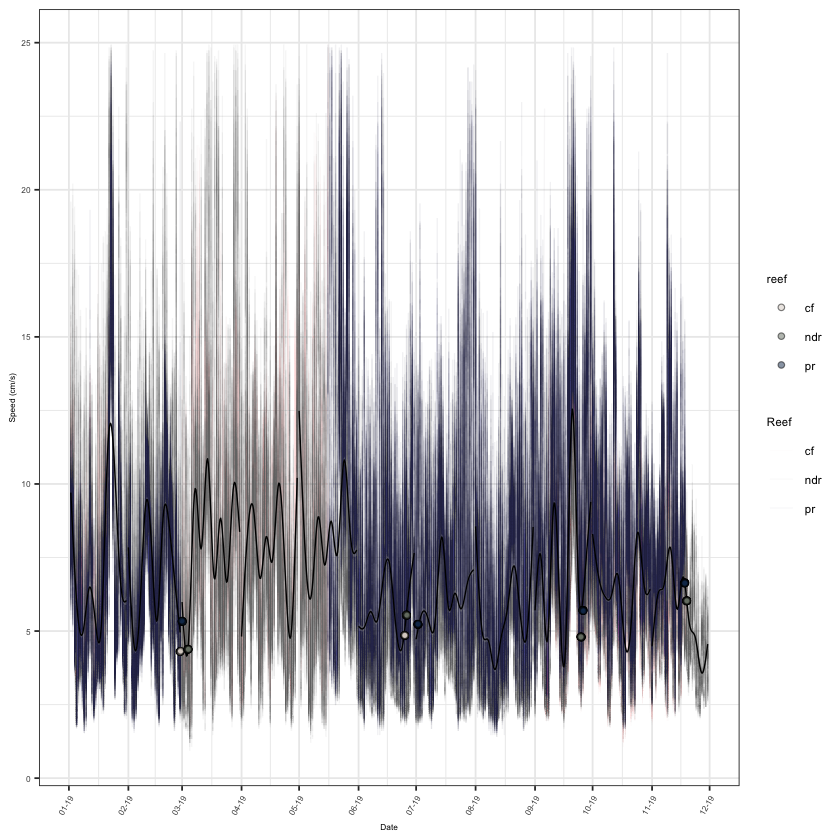

In [32]:
tcm_fig = tcm_all %>%
filter(year ==2019) %>%
filter(year !=2020) %>%
filter(Speed.cm.s. <=25) %>%
subset(Date> "2019-1-01" & Date < "2019-12-01") %>%
 ggplot(aes(x = as.Date(Date), y = Speed.cm.s., group=month)) +
geom_line(aes(x = as.Date(Date), y = Speed.cm.s., color=reef), size=0.4, alpha=0.03) +
geom_smooth(aes(x = as.Date(Date), y = Speed.cm.s.,), colour="black", size=0.4) +
geom_jitter(pch=21, alpha = 0.5,aes(fill=reef), data = trip_dates) +
theme_bw() +
scale_color_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
scale_fill_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
scale_fill_manual(values=c("#dad1cb","#767e72","#16375b")) +
scale_color_manual(values=c("#dad1cb","#767e72","#16375b")) +
scale_x_date(date_breaks ="1 month", date_labels ="%m-%y") +
#facet_grid(reef~.) +
theme(axis.text.x=element_text(angle = 60, hjust=1)) +
xlab("Date") +
ylab("Speed (cm/s)") +
guides(color=guide_legend(title="Reef")) +
theme(legend.text =element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
theme(legend.text =element_text(size=7)) +
theme(legend.title = element_text(size=7))

tcm_fig
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/tcm.png", width = 5, height = 4, units = "in", dpi=300)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


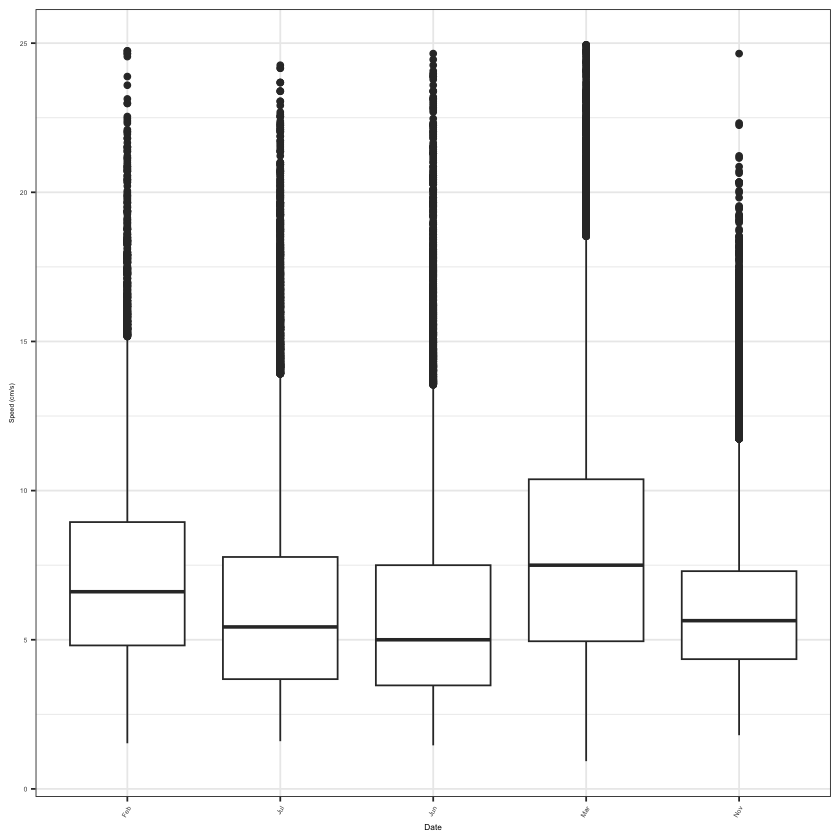

In [33]:
my_months=c("Feb","Mar","Jun", "Jul", "Sept", "Nov")
tcm_all %>%
filter(year ==2019) %>%
filter(year !=2020) %>%
filter(month %in% my_months) %>%
filter(Speed.cm.s. <=25) %>%
subset(Date> "2019-1-01" & Date < "2019-12-01") %>%
ggplot(aes(x = month, order(as.Date(Date)), y = Speed.cm.s., group=month)) +
geom_boxplot() +
theme_bw() +
scale_color_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
scale_fill_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
scale_fill_manual(values=c("#dad1cb","#767e72","#16375b")) +
scale_color_manual(values=c("#dad1cb","#767e72","#16375b")) +
#facet_grid(reef~.) +
theme(axis.text.x=element_text(angle = 60, hjust=1)) +
xlab("Date") +
ylab("Speed (cm/s)") +
guides(color=guide_legend(title="Reef")) +
theme(legend.text =element_text(size=3.7)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 4)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5))

In [34]:
head(temp_all)

,month,year,decimal_year,avg_sst,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<date>
1,Jan,2019,2019.003,24.96226,cf,2019-01-01
2,Jan,2019,2019.005,25.10979,cf,2019-01-02
3,Jan,2019,2019.008,25.14815,cf,2019-01-03
4,Jan,2019,2019.011,25.41415,cf,2019-01-04
5,Jan,2019,2019.014,25.37185,cf,2019-01-05
6,Jan,2019,2019.016,25.49293,cf,2019-01-06


In [35]:
head(chl_all)

,month,year,decimal_year,avg_chl,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<date>
1,Jan,2019,2019.079,0.7101063,cf,2019-01-29
2,Feb,2019,2019.101,1.1661320,cf,2019-02-06
3,Feb,2019,2019.123,0.2026868,cf,2019-02-14
4,Feb,2019,2019.145,0.6445027,cf,2019-02-22
5,Mar,2019,2019.167,1.2104095,cf,2019-03-02
6,Mar,2019,2019.189,1.1574974,cf,2019-03-10


In [36]:
head(chla_points)

,reef,Year,month,year,Lat_decimal,Long_decimal,avg_chla_8day_.mg.m.3.,sd_chla_8day_.mg.m.3.,avg_chla_monthly_.mg.m.3.,sd_chla_monthly_.mg.m.3.,avg.SST..deg.C.,sd.SST..deg.C.,Date
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1,cf,2019,Feb,2019,25.221,-80.210,0.6960258,0.4539086,1.249507,0.8486629,25.96821,0.1514858,2019-02-28
2,cf,2019,Jun,2019,25.221,-80.210,1.7920917,0.3763544,1.840000,1.0261407,29.63623,0.5081026,2019-06-25
3,cf,2019,Sep,2019,25.221,-80.210,1.1930631,0.0000000,1.393782,0.8628705,29.41868,0.4285187,2019-09-25
4,cf,2019,Nov,2019,25.221,-80.210,0.9899462,0.1509655,1.314622,0.8991632,27.62378,0.2019326,2019-11-18
5,ndr,2019,Mar,2019,25.218,-80.294,2.7002575,0.8883858,3.527487,1.8255791,26.45431,0.4208808,2019-03-04
6,ndr,2019,Jun,2019,25.218,-80.294,3.0906976,1.6064865,6.320000,3.0271655,30.03815,0.3614116,2019-06-26


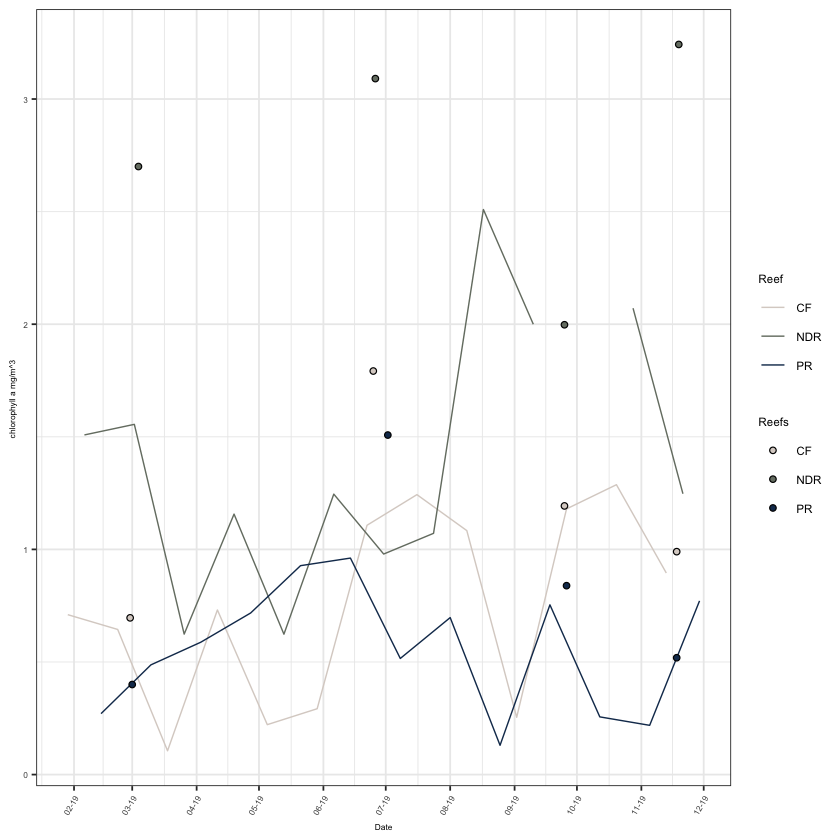

In [37]:
chla_fig = chl_all %>%
subset(Date> "2019-1-01" & Date < "2019-12-01") %>%
filter(reef==c("cf", "ndr", "pr")) %>%
ggplot(aes(x = as.Date(Date), y = 	avg_chl)) +
geom_line(aes(x = as.Date(Date), y = avg_chl, color=reef), size=0.4) +
#geom_line(aes(x = as.Date(Date), y = 	avg_chl), colour="black", size=0.4) +
#geom_point(aes(x = as.Date(Date), y = avg_chl, color=reef)) +
geom_point(pch=21, data = chla_points, aes(x = as.Date(Date), y = avg_chla_8day_.mg.m.3., fill=reef)) +
scale_color_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
scale_fill_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
theme_bw() +
scale_x_date(date_breaks ="1 month", date_labels ="%m-%y") +
#facet_grid(reef~.) +
theme(axis.text.x=element_text(angle = 60, hjust=1)) +
xlab("Date") +
ylab(expression("chlorophyll a mg/m^3 ")) +
guides(color=guide_legend(title="Reef")) +
theme(legend.text =element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
theme(legend.text =element_text(size=7)) +
theme(legend.title = element_text(size=7))
chla_fig
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/chla_fig.png", width = 5, height = 4, units = "in", dpi=300)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


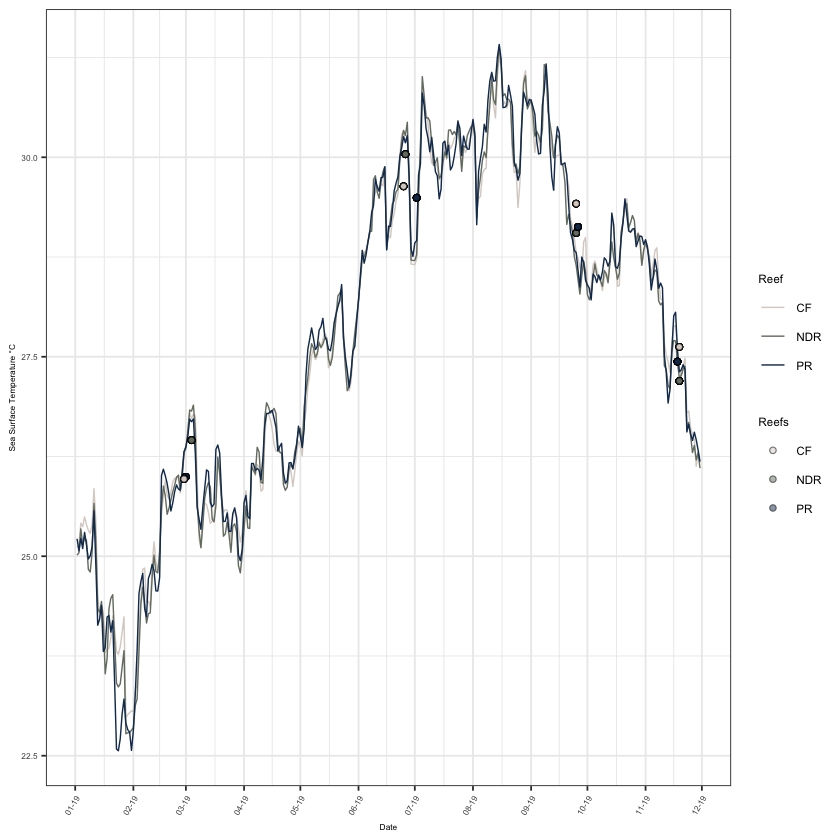

In [38]:
sst_fig = temp_all %>%
subset(Date> "2019-1-01" & Date < "2019-12-01") %>%
 ggplot(aes(x = as.Date(Date), y = avg_sst)) +
geom_line(aes(x = as.Date(Date), y = avg_sst, color=reef), size=0.4) +
geom_point( pch=21, alpha = 0.5, data = trip_dates, aes(x = as.Date(Date), y = avgSST_degC, fill=reef)) +
#geom_jitter(alpha = 0.5, data = trip_dates, aes(x = as.Date(Date), y = avg_sst)) +
theme_bw() +
scale_fill_manual(values=c("#dad1cb","#767e72","#16375b")) +
scale_color_manual(values=c("#dad1cb","#767e72","#16375b")) +
scale_x_date(date_breaks ="1 month", date_labels ="%m-%y") +
#facet_grid(reef~.) +
theme(axis.text.x=element_text(angle = 60, hjust=1)) +
scale_color_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
scale_fill_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
xlab("Date") +
ylab("Sea Surface Temperature °C") +
guides(color=guide_legend(title="Reef")) +
theme(legend.text =element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
theme(legend.text =element_text(size=7)) +
theme(legend.title = element_text(size=7))
sst_fig
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/temp_fig.png", width = 5, height = 4, units = "in", dpi=300)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


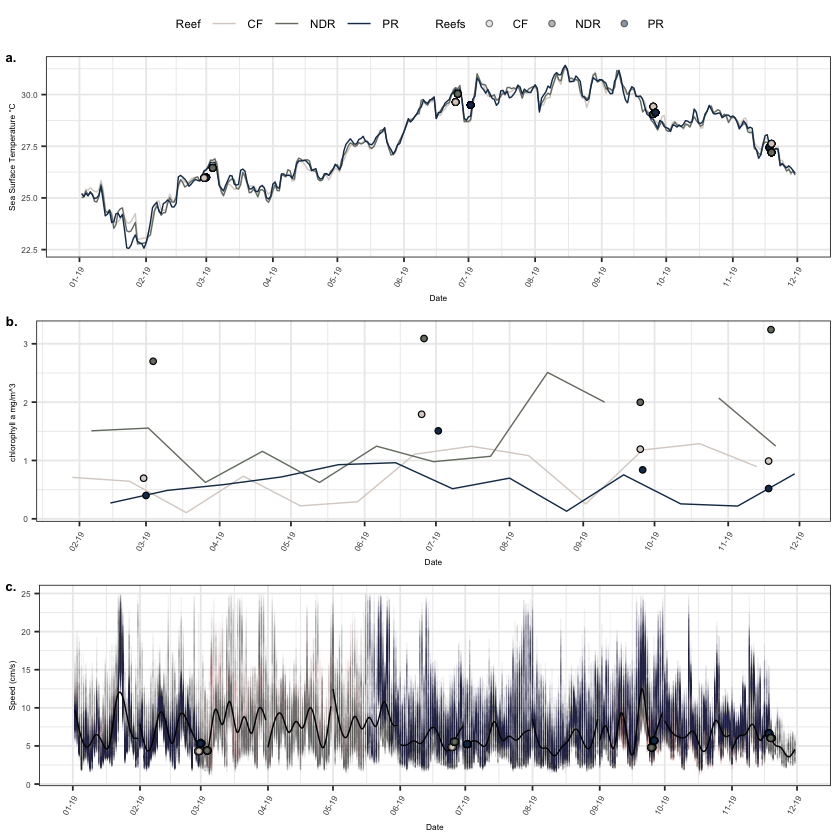

In [39]:
ggpubr::ggarrange(sst_fig, chla_fig, tcm_fig,
                 common.legend = T, ncol=1,
             labels = c("a.", "b.", "c."), font.label = list(size = 8))
ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/supl_fig1.png", width = 5.5, height = 5, units = "in", dpi=300)     

In [40]:
#Final metadata file
#write.csv(all_meta, "/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv", 
 #      row.names = FALSE)

In [41]:
head(all_meta)

bag_num,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,total_count,⋯,cluster_longitude,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-584,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-585,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-586,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-590,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,-80.41659,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-591,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,-80.41659,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-592,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,-80.41659,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


## Habitat data stats

              Df Sum Sq Mean Sq   F value Pr(>F)    
reef           2 0.0041  0.0021 2.306e+26 <2e-16 ***
Month.y        5 2.0447  0.4089 4.583e+28 <2e-16 ***
reef:Month.y   4 0.0245  0.0061 6.854e+26 <2e-16 ***
Residuals    351 0.0000  0.0000                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log2(avgSST_degC) ~ reef * Month.y, data = all_meta)

$reef
                diff           lwr           upr p adj
ndr-cf  0.0064482233  0.0064482233  0.0064482233     0
pr-cf  -0.0007346927 -0.0007346927 -0.0007346927     0
pr-ndr -0.0071829161 -0.0071829161 -0.0071829161     0

$Month.y
                           diff         lwr         upr p adj
July-February        0.18435641  0.18435641  0.18435641     0
June-February        0.19827921  0.19827921  0.19827921     0
March-February       0.01112140  0.01112140  0.01112140     0
November-February    0.07363393  0.07363393  0.07363393     0
September-February   0.16479694  0.16479694  0.16479694     0
June-July            0.01392280  0.01392280  0.01392280     0
March-July          -0.17323501 -0.17323501 -0.17323501     0
November-July       -0.11072249 -0.11072249 -0.11072249     0
September-July      -0.01955948 -0.01955948 -0.01955948  

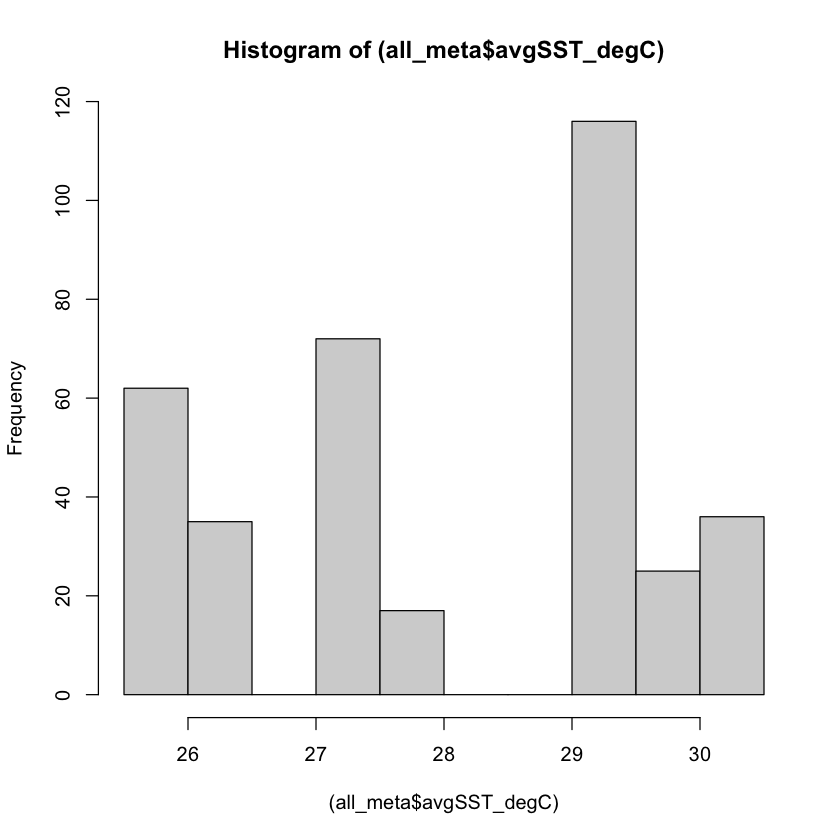

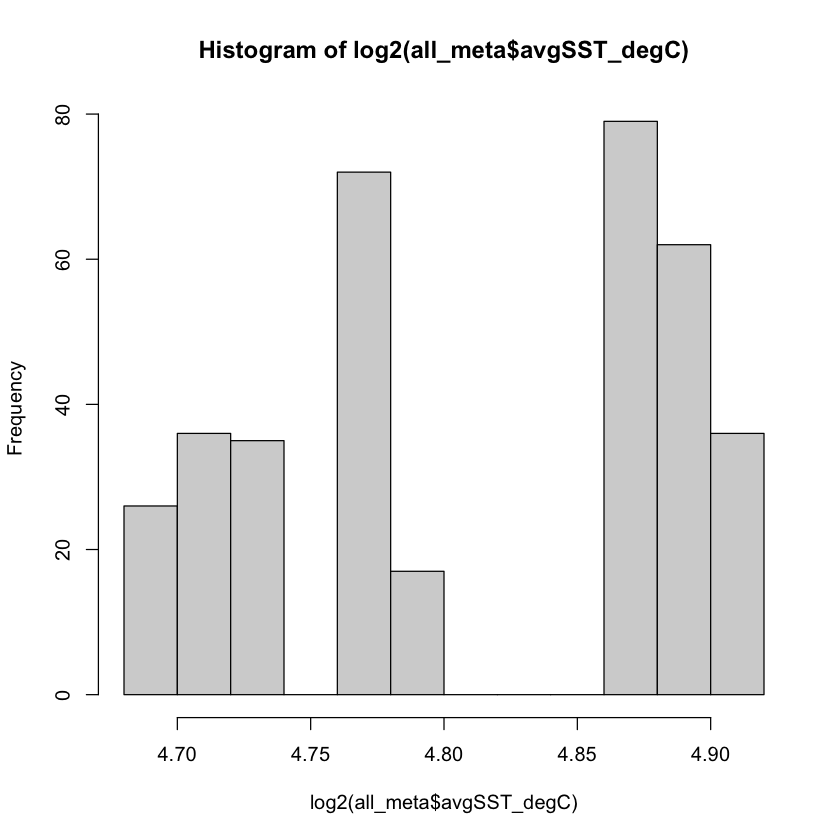

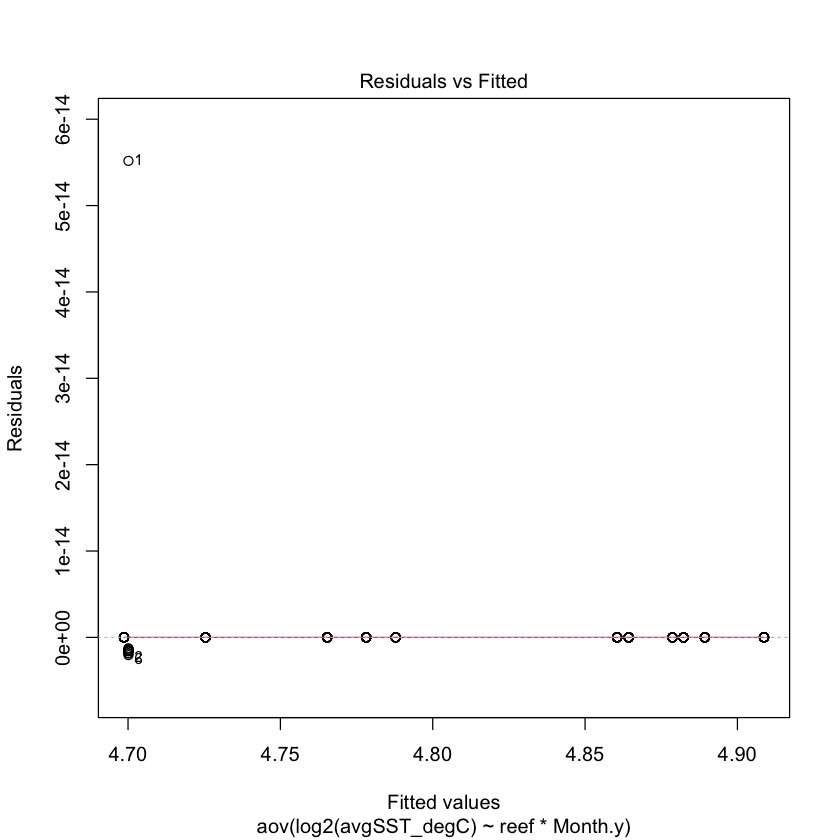

In [42]:
res= aov(log2(avgSST_degC)  ~ reef*Month.y, data = all_meta)
summary(res)
TukeyHSD(res)

hist((all_meta$avgSST_degC))
hist(log2(all_meta$avgSST_degC))
plot(res, which = 1)

In [43]:
library(lsmeans)
library("lme4")

In [44]:
mixed_model_no_intercept <- lm(log2(avg_sst) ~ 0 + reef * month, data = temp_all)
summary(mixed_model_no_intercept)

# Get estimated marginal means and perform pairwise comparisons for the no-intercept model
emms_no_intercept <- emmeans(mixed_model_no_intercept, ~ reef)
pairwise_comparisons_no_intercept <- contrast(emms_no_intercept, method = "pairwise")
print(pairwise_comparisons_no_intercept)


Call:
lm(formula = log2(avg_sst) ~ 0 + reef * month, data = temp_all)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.135746 -0.018056  0.001645  0.019844  0.085745 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
reefcf            4.7082970  0.0062172 757.301  < 2e-16 ***
reefndr           4.7120521  0.0062172 757.905  < 2e-16 ***
reefpr            4.7132415  0.0062172 758.097  < 2e-16 ***
monthAug          0.2155382  0.0087213  24.714  < 2e-16 ***
monthDec         -0.0231170  0.0087213  -2.651  0.00815 ** 
monthFeb         -0.0600710  0.0089481  -6.713 3.10e-11 ***
monthJan         -0.0987815  0.0087213 -11.327  < 2e-16 ***
monthJul          0.1999213  0.0087213  22.923  < 2e-16 ***
monthJun          0.1659610  0.0087925  18.875  < 2e-16 ***
monthMar         -0.0215675  0.0087213  -2.473  0.01356 *  
monthMay          0.0717452  0.0087213   8.226 5.61e-16 ***
monthNov          0.0785840  0.0087925   8.938  < 2e-16 ***
monthOct          0.

NOTE: Results may be misleading due to involvement in interactions



 contrast  estimate      SE   df t.ratio p.value
 cf - ndr  0.001836 0.00252 1059   0.728  0.7469
 cf - pr   0.000311 0.00252 1059   0.123  0.9916
 ndr - pr -0.001525 0.00252 1059  -0.605  0.8176

Results are averaged over the levels of: month 
Results are given on the log2 (not the response) scale. 
P value adjustment: tukey method for comparing a family of 3 estimates 


In [45]:
head(tcm_all)

,month,year,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,place,Date
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<date>
1,Oct,2018,36.25,156.41,-33.22,14.51,23.4131,cf,top,2018-10-22
2,Oct,2018,36.25,156.39,-33.22,14.52,23.2627,cf,top,2018-10-22
3,Oct,2018,36.25,156.37,-33.21,14.53,23.4311,cf,top,2018-10-22
4,Oct,2018,36.25,156.31,-33.20,14.57,23.3317,cf,top,2018-10-22
5,Oct,2018,36.25,156.41,-33.22,14.51,23.0338,cf,top,2018-10-22
6,Oct,2018,36.25,155.94,-33.10,14.78,22.7789,cf,top,2018-10-22


In [46]:
mixed_model_no_intercept <- lm(log(Speed.cm.s.) ~ 0 + reef, data = tcm_all)
summary(mixed_model_no_intercept)

# Get estimated marginal means and perform pairwise comparisons for the no-intercept model
emms_no_intercept <- emmeans(mixed_model_no_intercept, ~ reef)
pairwise_comparisons_no_intercept <- contrast(emms_no_intercept, method = "pairwise")
print(pairwise_comparisons_no_intercept)


Call:
lm(formula = log(Speed.cm.s.) ~ 0 + reef, data = tcm_all)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4043 -0.6316 -0.1412  0.3019  2.2748 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
reefcf  2.462590   0.002206    1116   <2e-16 ***
reefndr 1.972265   0.001663    1186   <2e-16 ***
reefpr  2.376245   0.001701    1397   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8945 on 730275 degrees of freedom
Multiple R-squared:  0.8631,	Adjusted R-squared:  0.8631 
F-statistic: 1.535e+06 on 3 and 730275 DF,  p-value: < 2.2e-16


 contrast estimate      SE     df  t.ratio p.value
 cf - ndr   0.4903 0.00276 730275  177.460  <.0001
 cf - pr    0.0863 0.00279 730275   30.996  <.0001
 ndr - pr  -0.4040 0.00238 730275 -169.820  <.0001

Results are given on the log (not the response) scale. 
P value adjustment: tukey method for comparing a family of 3 estimates 


In [47]:
head(chl_all)

,month,year,decimal_year,avg_chl,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<date>
1,Jan,2019,2019.079,0.7101063,cf,2019-01-29
2,Feb,2019,2019.101,1.1661320,cf,2019-02-06
3,Feb,2019,2019.123,0.2026868,cf,2019-02-14
4,Feb,2019,2019.145,0.6445027,cf,2019-02-22
5,Mar,2019,2019.167,1.2104095,cf,2019-03-02
6,Mar,2019,2019.189,1.1574974,cf,2019-03-10


In [48]:
mixed_model_no_intercept <- lm(sqrt(avg_chl) ~ 0 + reef * month, data = chl_all)
summary(mixed_model_no_intercept)

# Get estimated marginal means and perform pairwise comparisons for the no-intercept model
emms_no_intercept <- emmeans(mixed_model_no_intercept, ~ reef)
pairwise_comparisons_no_intercept <- contrast(emms_no_intercept, method = "pairwise")
print(pairwise_comparisons_no_intercept)


Call:
lm(formula = sqrt(avg_chl) ~ 0 + reef * month, data = chl_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64613 -0.12960  0.03079  0.15398  0.55629 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
reefcf            1.00162    0.14100   7.103 3.47e-10 ***
reefndr           0.83122    0.14100   5.895 7.36e-08 ***
reefpr            0.83822    0.14100   5.945 5.94e-08 ***
monthAug         -0.03105    0.19941  -0.156   0.8766    
monthDec         -0.01827    0.21539  -0.085   0.9326    
monthFeb         -0.22399    0.21539  -1.040   0.3013    
monthJan         -0.15894    0.31530  -0.504   0.6155    
monthJul         -0.10125    0.21539  -0.470   0.6395    
monthJun          0.07226    0.19941   0.362   0.7180    
monthMar         -0.16482    0.19941  -0.827   0.4108    
monthMay         -0.23631    0.19941  -1.185   0.2393    
monthNov         -0.04626    0.19941  -0.232   0.8171    
monthOct          0.01034    0.19941   0.052   0.9588    

NOTE: Results may be misleading due to involvement in interactions



 contrast estimate     SE df t.ratio p.value
 cf - ndr   -0.120 0.0678 85  -1.776  0.1839
 cf - pr     0.210 0.0675 85   3.116  0.0070
 ndr - pr    0.331 0.0682 85   4.852  <.0001

Results are averaged over the levels of: month 
Note: contrasts are still on the sqrt scale 
P value adjustment: tukey method for comparing a family of 3 estimates 


             Df Sum Sq Mean Sq F value Pr(>F)    
reef          2  1.366  0.6830   53.83 <2e-16 ***
Residuals   360  4.568  0.0127                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log(Speed.cm.s.) ~ reef, data = all_meta)

$reef
             diff        lwr        upr     p adj
ndr-cf 0.05987439 0.02305213 0.09669664 0.0004486
pr-cf  0.15422413 0.11759717 0.19085109 0.0000000
pr-ndr 0.09434974 0.06266223 0.12603725 0.0000000


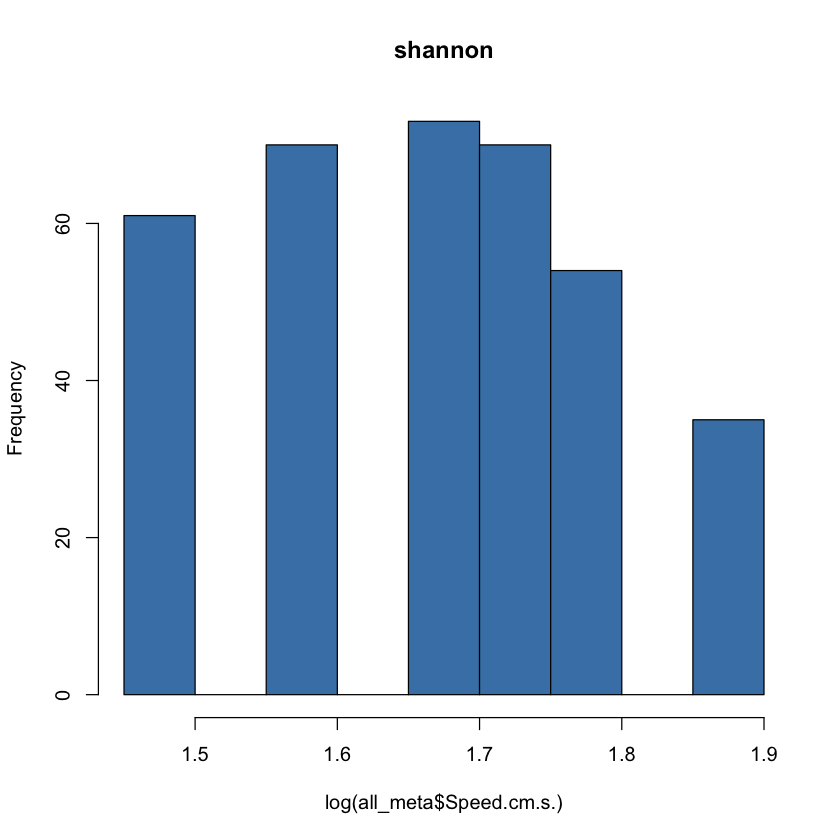

             Df Sum Sq Mean Sq F value Pr(>F)    
Samp_trip     3  3.962  1.3206   240.5 <2e-16 ***
Residuals   359  1.972  0.0055                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log(Speed.cm.s.) ~ Samp_trip, data = all_meta)

$Samp_trip
                     diff         lwr        upr     p adj
Trip_3-Trip_2  0.11043883  0.08304347 0.13783420 0.0000000
Trip_4-Trip_2  0.09589332  0.06690549 0.12488114 0.0000000
Trip_5-Trip_2  0.28796376  0.25988782 0.31603970 0.0000000
Trip_4-Trip_3 -0.01454552 -0.04346688 0.01437584 0.5647117
Trip_5-Trip_3  0.17752492  0.14951761 0.20553224 0.0000000
Trip_5-Trip_4  0.19207044  0.16250361 0.22163727 0.0000000


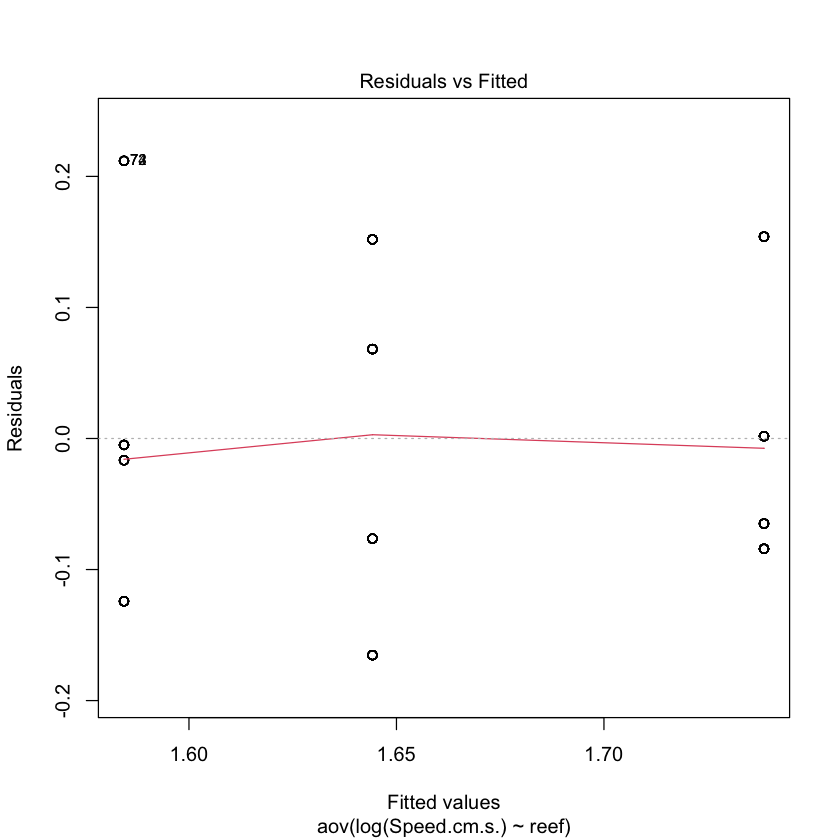

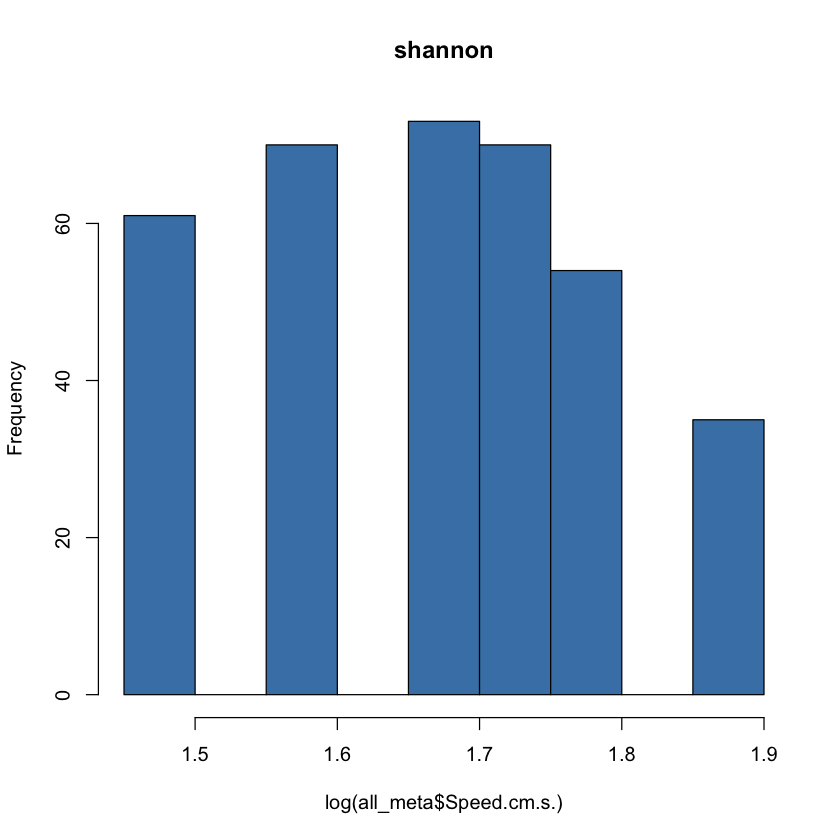

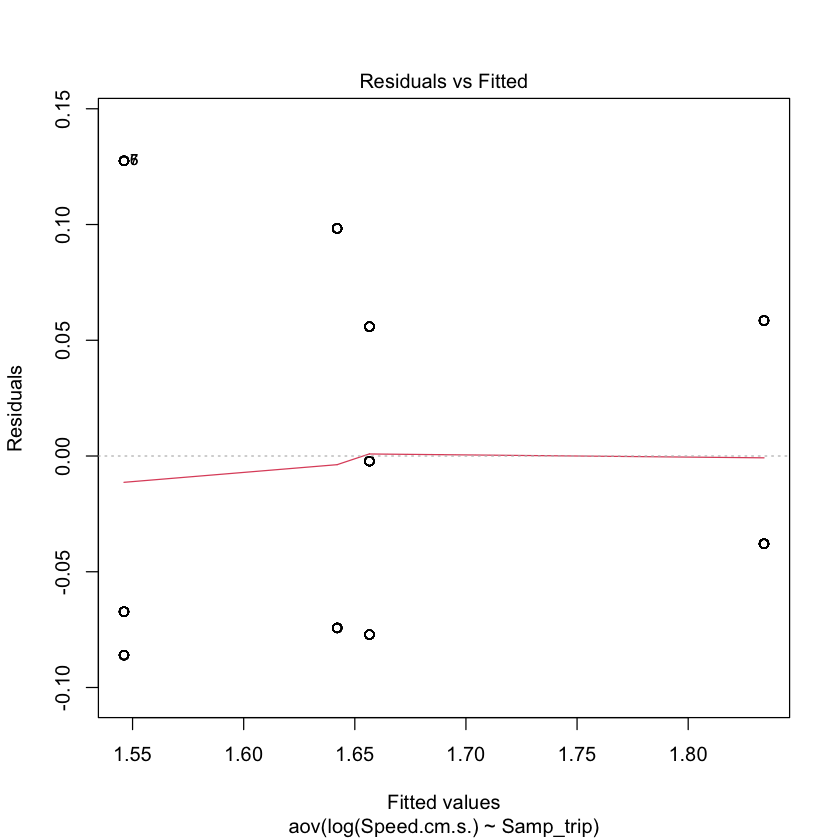

In [49]:
res= aov(log(Speed.cm.s.) ~ reef, data = all_meta)
summary(res)
TukeyHSD(res)
hist(log(all_meta$Speed.cm.s.), col='steelblue', main='shannon')
plot(res, which = 1)


res= aov(log(Speed.cm.s.) ~ Samp_trip, data = all_meta)
summary(res)
TukeyHSD(res)
hist(log(all_meta$Speed.cm.s.), col='steelblue', main='shannon')
plot(res, which = 1)

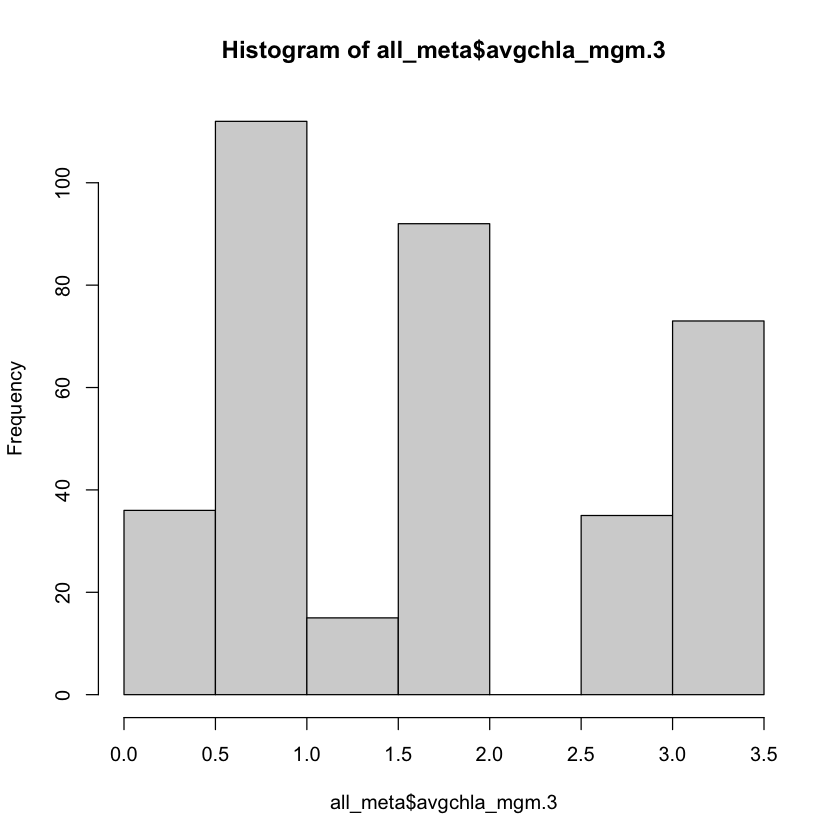

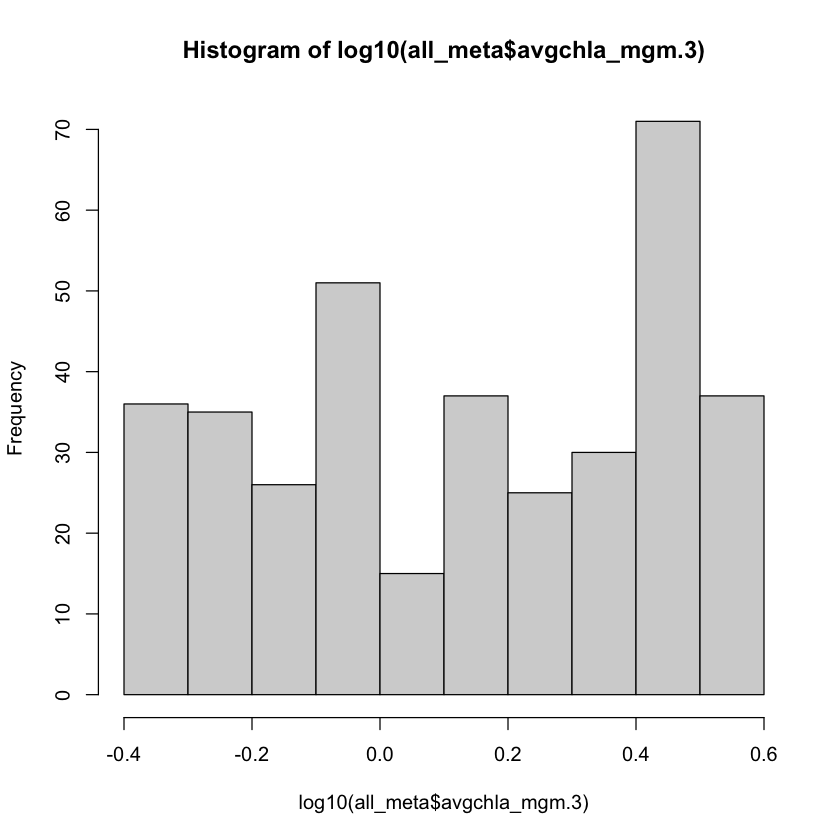

             Df Sum Sq Mean Sq F value Pr(>F)    
reef          2  46.05  23.024   597.1 <2e-16 ***
Residuals   360  13.88   0.039                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sqrt(avgchla_mgm.3) ~ reef, data = all_meta)

$reef
             diff        lwr        upr p adj
ndr-cf  0.5996735  0.5354826  0.6638644     0
pr-cf  -0.1886210 -0.2524715 -0.1247705     0
pr-ndr -0.7882945 -0.8435342 -0.7330548     0


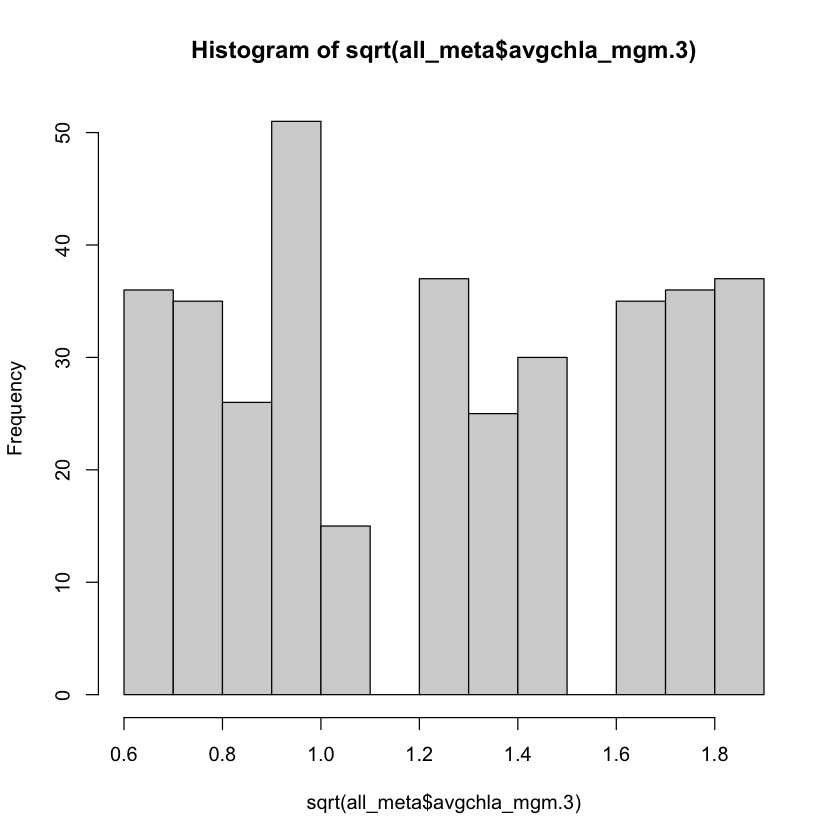

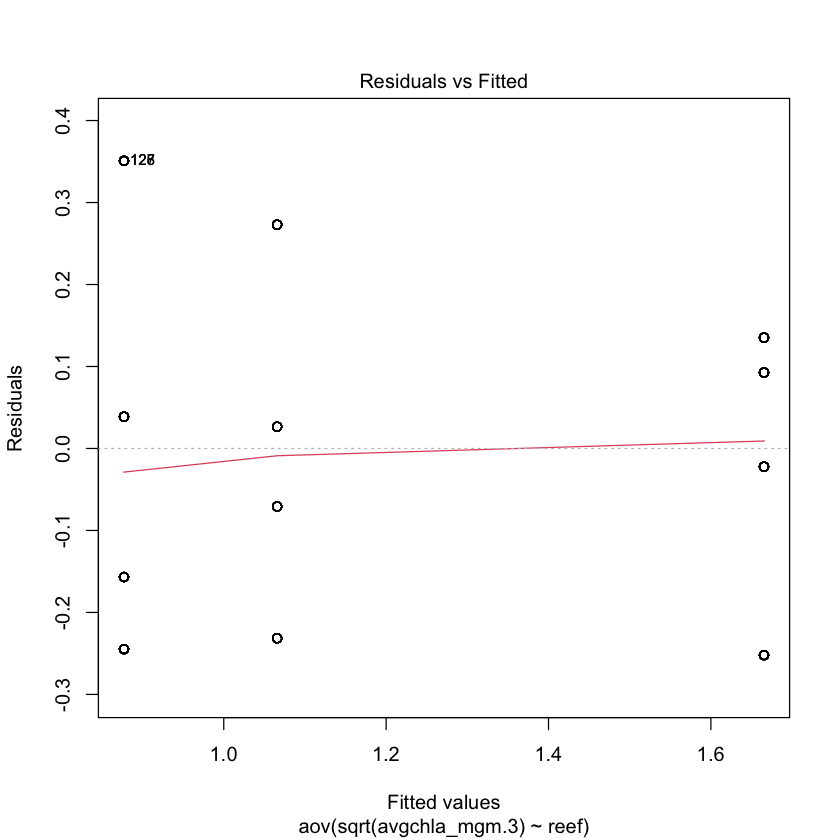

In [50]:
hist(all_meta$avgchla_mgm.3)
hist(log10(all_meta$avgchla_mgm.3))
hist(sqrt(all_meta$avgchla_mgm.3))

res= aov(sqrt(avgchla_mgm.3) ~ reef, data = all_meta)
summary(res)
TukeyHSD(res)

plot(res, which = 1)

In [51]:
res= aov(sqrt(avgchla_mgm.3) ~ reef, data = all_meta)
summary(res)
TukeyHSD(res)



res= aov(sqrt(avgchla_mgm.3) ~ Samp_trip, data = all_meta)
summary(res)
TukeyHSD(res)

all_meta %>%
filter(reef!="gr") %>%
  wilcox_test(avgchla_mgm.3~ Samp_trip) %>%
  adjust_pvalue(method="bonferroni") 


chla %>%
filter(reef!="gr") %>%
filter(Year=="2019") %>%
  wilcox_test(avg_chla_monthly_.mg.m.3.~ reef) %>%
  adjust_pvalue(method="bonferroni") 

chla %>%
filter(reef!="gr") %>%
filter(Year=="2019") %>%
#group_by("reef") %>%
  wilcox_test(avg_chla_monthly_.mg.m.3.~ collection_date) %>%
  adjust_pvalue(method="bonferroni") 

             Df Sum Sq Mean Sq F value Pr(>F)    
reef          2  46.05  23.024   597.1 <2e-16 ***
Residuals   360  13.88   0.039                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sqrt(avgchla_mgm.3) ~ reef, data = all_meta)

$reef
             diff        lwr        upr p adj
ndr-cf  0.5996735  0.5354826  0.6638644     0
pr-cf  -0.1886210 -0.2524715 -0.1247705     0
pr-ndr -0.7882945 -0.8435342 -0.7330548     0


             Df Sum Sq Mean Sq F value   Pr(>F)    
Samp_trip     3   8.52  2.8384   19.82 6.56e-12 ***
Residuals   359  51.41  0.1432                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sqrt(avgchla_mgm.3) ~ Samp_trip, data = all_meta)

$Samp_trip
                     diff         lwr         upr     p adj
Trip_3-Trip_2  0.39965564  0.25975662  0.53955465 0.0000000
Trip_4-Trip_2  0.08704210 -0.06098907  0.23507327 0.4279308
Trip_5-Trip_2  0.17065028  0.02727580  0.31402475 0.0122038
Trip_4-Trip_3 -0.31261353 -0.46030530 -0.16492176 0.0000005
Trip_5-Trip_3 -0.22900536 -0.37202939 -0.08598133 0.0002601
Trip_5-Trip_4  0.08360817 -0.06737980  0.23459614 0.4818836


.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
avgchla_mgm.3,Trip_2,Trip_3,97,98,2170,2.87e-11,1.722e-10,****
avgchla_mgm.3,Trip_2,Trip_4,97,79,2765,1.00e-03,6.000e-03,**
avgchla_mgm.3,Trip_2,Trip_5,97,89,2730,1.11e-05,6.660e-05,****
avgchla_mgm.3,Trip_3,Trip_4,98,79,5882,1.61e-09,9.660e-09,****
avgchla_mgm.3,Trip_3,Trip_5,98,89,5096,4.30e-02,2.580e-01,ns
avgchla_mgm.3,Trip_4,Trip_5,79,89,3530,9.64e-01,1.000e+00,ns


.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
avg_chla_monthly_.mg.m.3.,cf,ndr,4,5,0,0.016,0.048,*
avg_chla_monthly_.mg.m.3.,cf,pr,4,5,20,0.016,0.048,*
avg_chla_monthly_.mg.m.3.,ndr,pr,5,5,25,0.008,0.024,*


.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
avg_chla_monthly_.mg.m.3.,1-Mar-19,14-Nov-18,1,1,0,1.000,1,ns
avg_chla_monthly_.mg.m.3.,1-Mar-19,18-Nov-19,1,2,0,0.667,1,ns
avg_chla_monthly_.mg.m.3.,1-Mar-19,19-Nov-19,1,1,0,1.000,1,ns
avg_chla_monthly_.mg.m.3.,1-Mar-19,2-Jul-19,1,1,0,1.000,1,ns
avg_chla_monthly_.mg.m.3.,1-Mar-19,20-Nov-18,1,1,0,1.000,1,ns
avg_chla_monthly_.mg.m.3.,1-Mar-19,25-Jun-19,1,1,0,1.000,1,ns
avg_chla_monthly_.mg.m.3.,1-Mar-19,25-Sep-19,1,2,0,0.667,1,ns
avg_chla_monthly_.mg.m.3.,1-Mar-19,26-Jun-19,1,1,0,1.000,1,ns
avg_chla_monthly_.mg.m.3.,1-Mar-19,26-Sep-19,1,1,0,1.000,1,ns
